# Statistical analysis of Wave data in Ireland

This document is a statistical analysis of the wave data in Ireland. The data is provided by the Marine Institute of Ireland and is available on the [Marine Institute website](https://erddap.marine.ie/erddap/griddap/IMI_EATL_WAVES_LATEST.html). The data is collected from the Irish wave buoy network and is updated every 30 minutes. The data is collected from 5 wave buoys located around the Irish coast. The data is collected from the following wave buoys: M1 to M6.

The best it would be to use a virtual environement to run this notebook to avoid any conflict with the libraries. You coud use Anaconda or venv to create a virtual environement. When using venv follow the following steps:

```bash
python3 -m venv myenv
```
To activate environement use the following command:
```bash
source myenv/bin/activate
```

On Windows you can use the following command:

```bash
myenv\Scripts\activate
```


To use this notebook, you will need to install necesary libraries using the following command:

```bash
pip install -r requirements.txt
```

-----

First import neccasaary libraries

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Read data file and read first two lines which include column name and units:

In [19]:

with open('buoys_data.csv', 'r') as file:
    columns = file.readline().strip().split(',')
    units = file.readline().strip().split(',')

print("List of columns:")
print(columns)
print("List of units:")
print(units)

List of columns:
['station_id', 'CallSign', 'longitude', 'latitude', 'time', 'AtmosphericPressure', 'WindDirection', 'WindSpeed', 'Gust', 'WaveHeight', 'WavePeriod', 'MeanWaveDirection', 'Hmax', 'AirTemperature', 'DewPoint', 'SeaTemperature', 'salinity', 'RelativeHumidity', 'SprTp', 'ThTp', 'Tp', 'QC_Flag']
List of units:
['', '', 'degrees_east', 'degrees_north', 'UTC', 'millibars', 'degrees true', 'knots', 'knots', 'meters', 'seconds', 'degrees_true', 'meters', 'degrees_C', 'degrees_C', 'degrees_C', 'dimensionless', 'percent', 'degrees', 'degrees_true', 'seconds', '']


Combine column names with units

In [20]:

combined_columns = [f"{col} ({unit})" for col, unit in zip(columns, units)]
print("List of combined columns:")
for col in combined_columns:
    print(col)

List of combined columns:
station_id ()
CallSign ()
longitude (degrees_east)
latitude (degrees_north)
time (UTC)
AtmosphericPressure (millibars)
WindDirection (degrees true)
WindSpeed (knots)
Gust (knots)
WaveHeight (meters)
WavePeriod (seconds)
MeanWaveDirection (degrees_true)
Hmax (meters)
AirTemperature (degrees_C)
DewPoint (degrees_C)
SeaTemperature (degrees_C)
salinity (dimensionless)
RelativeHumidity (percent)
SprTp (degrees)
ThTp (degrees_true)
Tp (seconds)
QC_Flag ()


Next read the data file, create a dataframe `buoys` applying column names `combined_columns` and display the first few rows of the dataframe:

In [21]:
# Read the remaining data into a DataFrame
buoys = pd.read_csv('buoys_data.csv', skiprows=2, names=combined_columns)

# Ensure the 'time (UTC)' column is in datetime format if it exists
if 'time (UTC)' in buoys.columns:
    buoys['time (UTC)'] = pd.to_datetime(buoys['time (UTC)'])

# Set 'time (UTC)' as the index for resampling
buoys.set_index('time (UTC)', inplace=True)

print("Data frame Head: ", buoys.head())



/var/folders/_b/h47kzxk57zjfrl8mh7tzd5fm0000gn/T/ipykernel_45139/3584351240.py:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  buoys = pd.read_csv('buoys_data.csv', skiprows=2, names=combined_columns)


Data frame Head:                            station_id () CallSign ()  longitude (degrees_east)  \
time (UTC)                                                                      
2001-02-06 13:00:00+00:00            M1       62090                     -11.2   
2001-02-06 14:00:00+00:00            M1       62090                     -11.2   
2001-02-06 15:00:00+00:00            M1       62090                     -11.2   
2001-02-06 16:00:00+00:00            M1       62090                     -11.2   
2001-02-06 18:00:00+00:00            M1       62090                     -11.2   

                           latitude (degrees_north)  \
time (UTC)                                            
2001-02-06 13:00:00+00:00                   53.1266   
2001-02-06 14:00:00+00:00                   53.1266   
2001-02-06 15:00:00+00:00                   53.1266   
2001-02-06 16:00:00+00:00                   53.1266   
2001-02-06 18:00:00+00:00                   53.1266   

                           A

Lets look at data statistics in the dataframe:

In [22]:
print("Dataframe info: ")
print("****************************************************************************************")

print(buoys.info())


Dataframe info: 
****************************************************************************************
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 886913 entries, 2001-02-06 13:00:00+00:00 to 2025-01-03 15:00:00+00:00
Data columns (total 21 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   station_id ()                     886913 non-null  object 
 1   CallSign ()                       886913 non-null  object 
 2   longitude (degrees_east)          886913 non-null  float64
 3   latitude (degrees_north)          886913 non-null  float64
 4   AtmosphericPressure (millibars)   867863 non-null  float64
 5   WindDirection (degrees true)      820852 non-null  float64
 6   WindSpeed (knots)                 787480 non-null  float64
 7   Gust (knots)                      741705 non-null  float64
 8   WaveHeight (meters)               779781 non-null  float64
 9   WavePeriod (seconds)        

In [23]:
print("Dataframe statistics for columns 4 to 8:")
print("****************************************************************************************")
print(buoys.iloc[:,4:8].describe())

Dataframe statistics for columns 4 to 8:
****************************************************************************************
       AtmosphericPressure (millibars)  WindDirection (degrees true)  \
count                    867863.000000                 820852.000000   
mean                       1013.259160                    205.562056   
std                          12.646991                     91.124456   
min                         902.400000                      0.000000   
25%                        1005.774000                    150.000000   
50%                        1014.600000                    220.000000   
75%                        1022.009000                    274.000000   
max                        1049.854000                    360.000000   

       WindSpeed (knots)   Gust (knots)  
count      787480.000000  741705.000000  
mean           15.271639      21.176198  
std             6.946542       9.601294  
min             0.000000       0.000000  
25%        

Lets look at years which are present in the dataframe:

In [24]:
years = buoys.index.year.unique()
print("Years in the dataset: ", years)

Years in the dataset:  Index([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024,
       2025],
      dtype='int32', name='time (UTC)')


Lets selecy only some years from the data frame:

In [25]:
# Define the years you want to include
years_to_include = [
        2020, 2021, 2022, 2023, 2024,
       2025]

# Filter the DataFrame to include only the specified years
buoys_filtered = buoys[buoys.index.year.isin(years_to_include)]
print("Filtered Dataframe: ", buoys_filtered.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 206972 entries, 2020-01-01 00:00:00+00:00 to 2025-01-03 15:00:00+00:00
Data columns (total 21 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   station_id ()                     206972 non-null  object 
 1   CallSign ()                       206972 non-null  object 
 2   longitude (degrees_east)          206972 non-null  float64
 3   latitude (degrees_north)          206972 non-null  float64
 4   AtmosphericPressure (millibars)   205153 non-null  float64
 5   WindDirection (degrees true)      202370 non-null  float64
 6   WindSpeed (knots)                 202370 non-null  float64
 7   Gust (knots)                      201555 non-null  float64
 8   WaveHeight (meters)               195724 non-null  float64
 9   WavePeriod (seconds)              195724 non-null  float64
 10  MeanWaveDirection (degrees_true)  192880 non-null  float64
 11  Hmax (

Resample the data to monthly means, max, min, and std.

Possible intervals for resampling are:
- `'B'`: Business day frequency
- `'C'`: Custom business day frequency
- `'D'`: Calendar day frequency
- `'W'`: Weekly frequency
- `'M'`: Month end frequency (deprecated, use `'ME'`)
- `'ME'`: Month end frequency
- `'MS'`: Month start frequency
- `'Q'`: Quarter end frequency
- `'QS'`: Quarter start frequency
- `'A'`: Year end frequency
- `'AS'`: Year start frequency
- `'H'`: Hourly frequency
- `'T'` or `'min'`: Minutely frequency
- `'S'`: Secondly frequency
- `'L'` or `'ms'`: Millisecond frequency
- `'U'` or `'us'`: Microsecond frequency
- `'N'`: Nanosecond frequency

In [26]:

buoys_monthly = buoys_filtered[['WaveHeight (meters)', 'WindSpeed (knots)', 'AirTemperature (degrees_C)', 'Gust (knots)']].resample('MS').agg(['mean', 'max', 'min', 'std'])

print(buoys_monthly.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 61 entries, 2020-01-01 00:00:00+00:00 to 2025-01-01 00:00:00+00:00
Freq: MS
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   (WaveHeight (meters), mean)         61 non-null     float64
 1   (WaveHeight (meters), max)          61 non-null     float64
 2   (WaveHeight (meters), min)          61 non-null     float64
 3   (WaveHeight (meters), std)          61 non-null     float64
 4   (WindSpeed (knots), mean)           61 non-null     float64
 5   (WindSpeed (knots), max)            61 non-null     float64
 6   (WindSpeed (knots), min)            61 non-null     float64
 7   (WindSpeed (knots), std)            61 non-null     float64
 8   (AirTemperature (degrees_C), mean)  61 non-null     float64
 9   (AirTemperature (degrees_C), max)   61 non-null     float64
 10  (AirTemperature (degrees_C), min)   61 non-null     f

## Plotting the data

Lets plot the data for Wave Height.

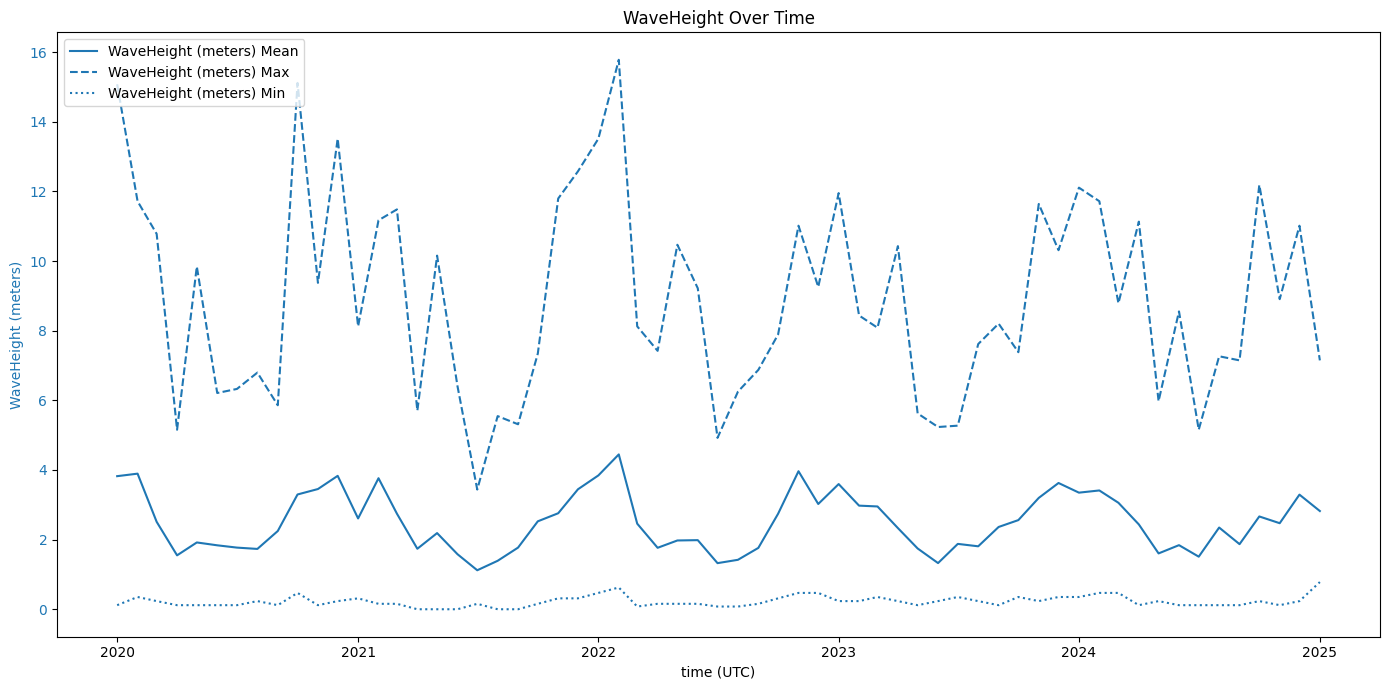

In [27]:

fig1, ax1 = plt.subplots(figsize=(14, 7))
sns.lineplot(data=buoys_monthly['WaveHeight (meters)'], x=buoys_monthly.index, y='mean', ax=ax1, color='tab:blue', label='WaveHeight (meters) Mean')
sns.lineplot(data=buoys_monthly['WaveHeight (meters)'], x=buoys_monthly.index, y='max', ax=ax1, color='tab:blue', linestyle='--', label='WaveHeight (meters) Max')
sns.lineplot(data=buoys_monthly['WaveHeight (meters)'], x=buoys_monthly.index, y='min', ax=ax1, color='tab:blue', linestyle=':', label='WaveHeight (meters) Min')
ax1.set_ylabel('WaveHeight (meters)', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.legend(loc='upper left')
ax1.set_title('WaveHeight Over Time')
fig1.tight_layout()
plt.show()


Lets plot wind speed data for all buoys.

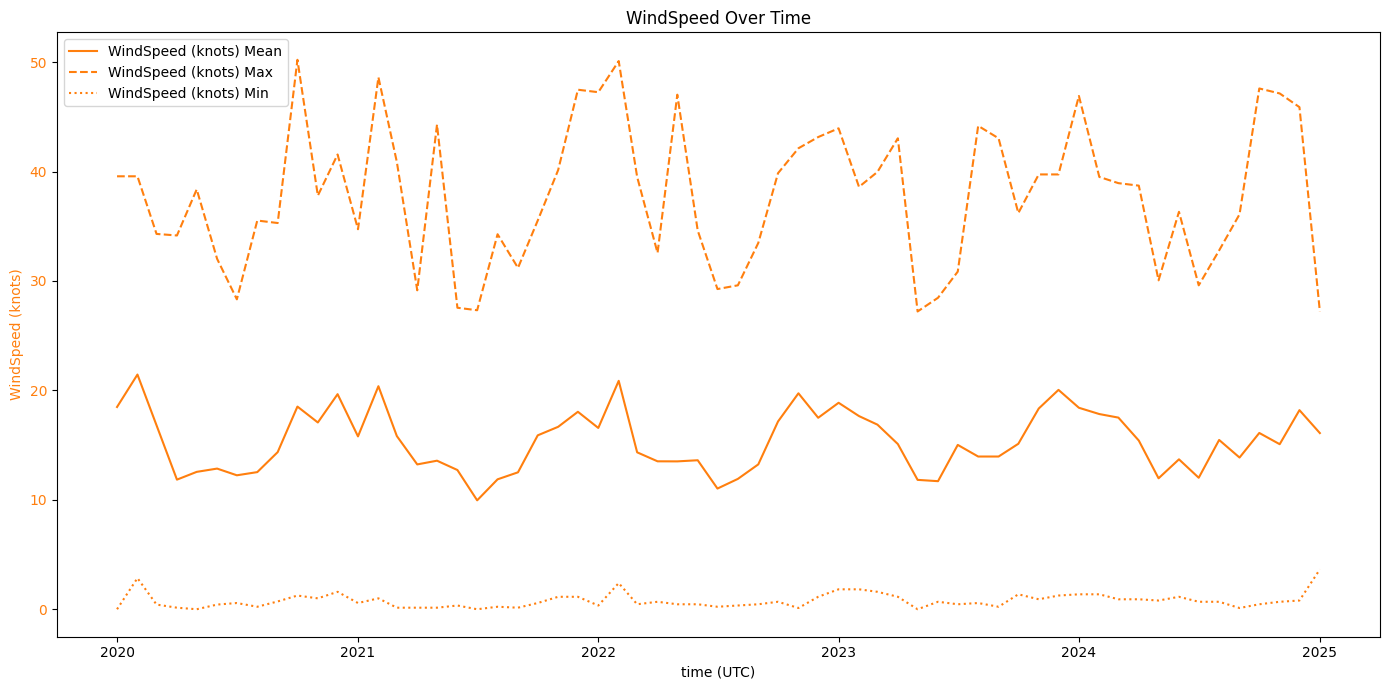

In [28]:

fig2, ax2 = plt.subplots(figsize=(14, 7))
sns.lineplot(data=buoys_monthly['WindSpeed (knots)'], x=buoys_monthly.index, y='mean', ax=ax2, color='tab:orange', label='WindSpeed (knots) Mean')
sns.lineplot(data=buoys_monthly['WindSpeed (knots)'], x=buoys_monthly.index, y='max', ax=ax2, color='tab:orange', linestyle='--', label='WindSpeed (knots) Max')
sns.lineplot(data=buoys_monthly['WindSpeed (knots)'], x=buoys_monthly.index, y='min', ax=ax2, color='tab:orange', linestyle=':', label='WindSpeed (knots) Min')
ax2.set_ylabel('WindSpeed (knots)', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')
ax2.legend(loc='upper left')
ax2.set_title('WindSpeed Over Time')
fig2.tight_layout()
plt.show()

Wind Gust over time for all buoys.

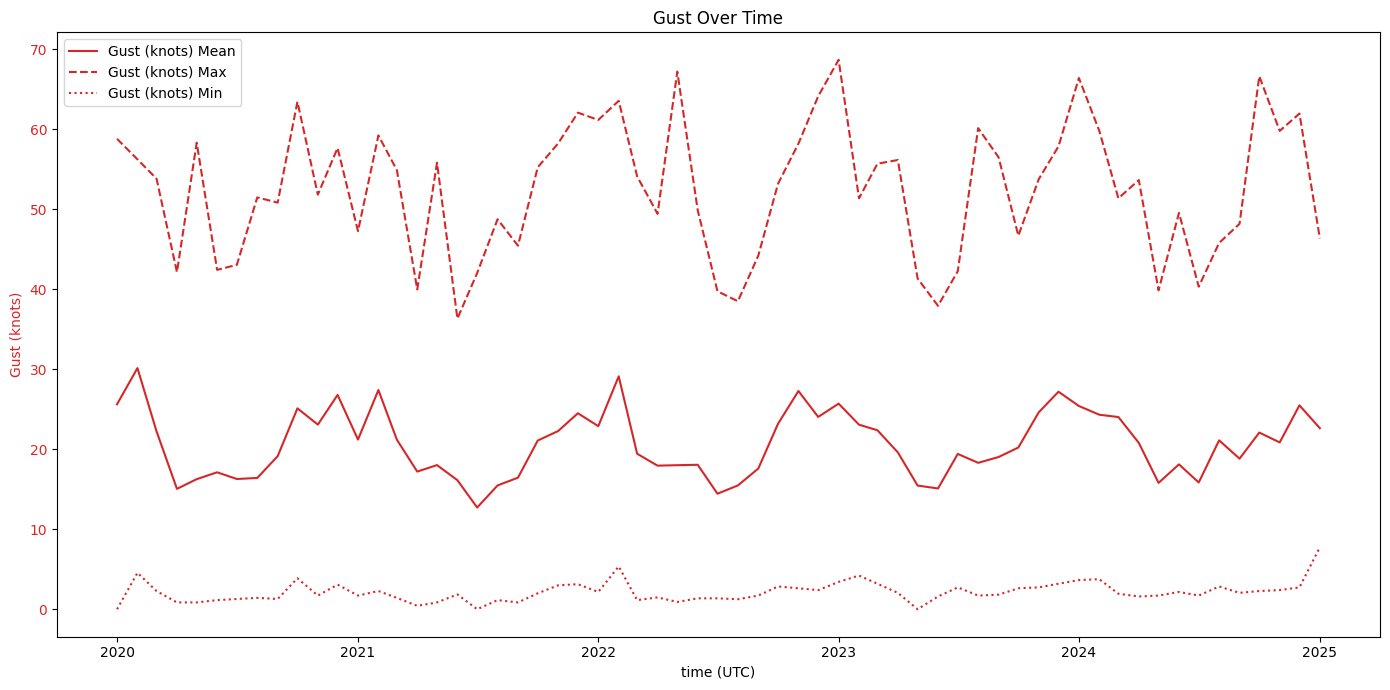

In [29]:

fig4, ax4 = plt.subplots(figsize=(14, 7))
sns.lineplot(data=buoys_monthly['Gust (knots)'], x=buoys_monthly.index, y='mean', ax=ax4, color='tab:red', label='Gust (knots) Mean')
sns.lineplot(data=buoys_monthly['Gust (knots)'], x=buoys_monthly.index, y='max', ax=ax4, color='tab:red', linestyle='--', label='Gust (knots) Max')
sns.lineplot(data=buoys_monthly['Gust (knots)'], x=buoys_monthly.index, y='min', ax=ax4, color='tab:red', linestyle=':', label='Gust (knots) Min')
ax4.set_ylabel('Gust (knots)', color='tab:red')
ax4.tick_params(axis='y', labelcolor='tab:red')
ax4.legend(loc='upper left')
ax4.set_title('Gust Over Time')
fig4.tight_layout()
plt.show()

Plotting air temperature for all buoys.

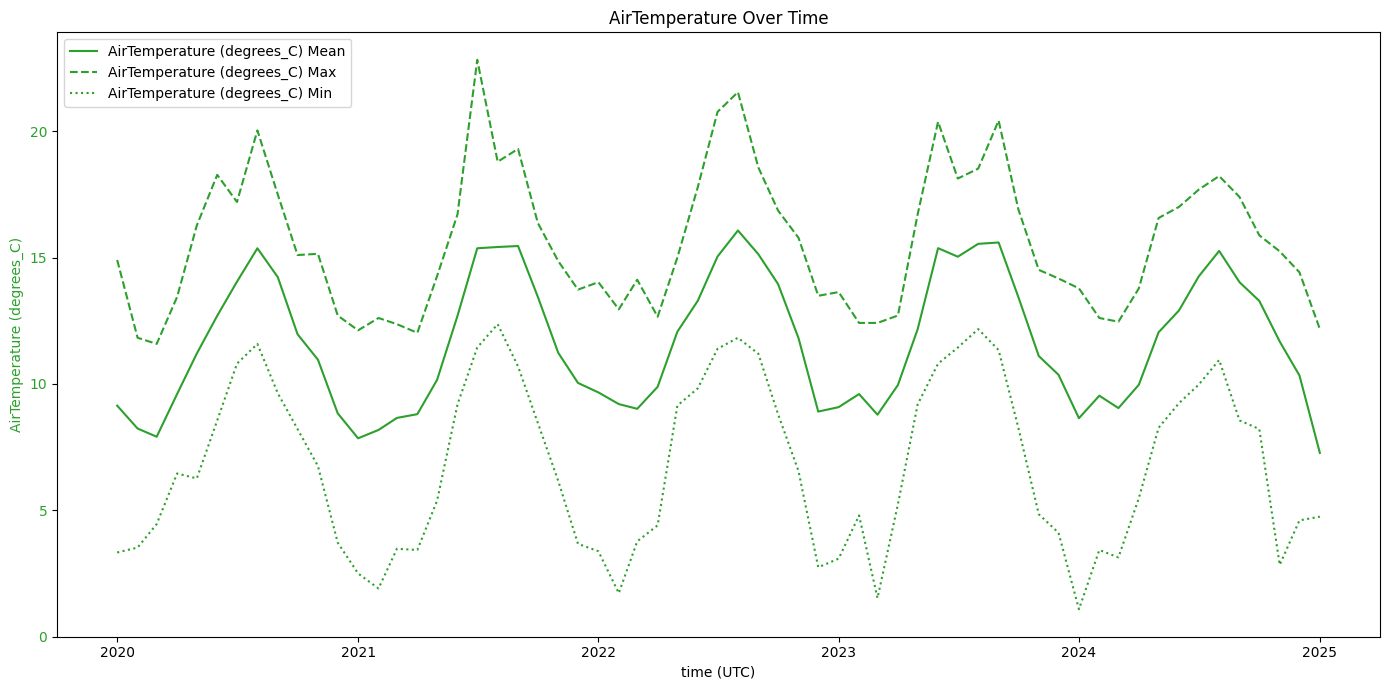

In [30]:

fig3, ax3 = plt.subplots(figsize=(14, 7))
sns.lineplot(data=buoys_monthly['AirTemperature (degrees_C)'], x=buoys_monthly.index, y='mean', ax=ax3, color='tab:green', label='AirTemperature (degrees_C) Mean')
sns.lineplot(data=buoys_monthly['AirTemperature (degrees_C)'], x=buoys_monthly.index, y='max', ax=ax3, color='tab:green', linestyle='--', label='AirTemperature (degrees_C) Max')
sns.lineplot(data=buoys_monthly['AirTemperature (degrees_C)'], x=buoys_monthly.index, y='min', ax=ax3, color='tab:green', linestyle=':', label='AirTemperature (degrees_C) Min')
ax3.set_ylabel('AirTemperature (degrees_C)', color='tab:green')
ax3.tick_params(axis='y', labelcolor='tab:green')
ax3.legend(loc='upper left')
ax3.set_title('AirTemperature Over Time')
fig3.tight_layout()
plt.show()

And now some statistics using box-plot

['M6' 'M3' 'M4' 'M5' 'M2']
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 41851 entries, 2020-01-01 00:00:00+00:00 to 2025-01-03 15:00:00+00:00
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   station_id ()                     41851 non-null  object 
 1   CallSign ()                       41851 non-null  object 
 2   longitude (degrees_east)          41851 non-null  float64
 3   latitude (degrees_north)          41851 non-null  float64
 4   AtmosphericPressure (millibars)   41848 non-null  float64
 5   WindDirection (degrees true)      41848 non-null  float64
 6   WindSpeed (knots)                 41848 non-null  float64
 7   Gust (knots)                      41848 non-null  float64
 8   WaveHeight (meters)               36219 non-null  float64
 9   WavePeriod (seconds)              36219 non-null  float64
 10  MeanWaveDirection (degrees_true)  36219 non-null  float6

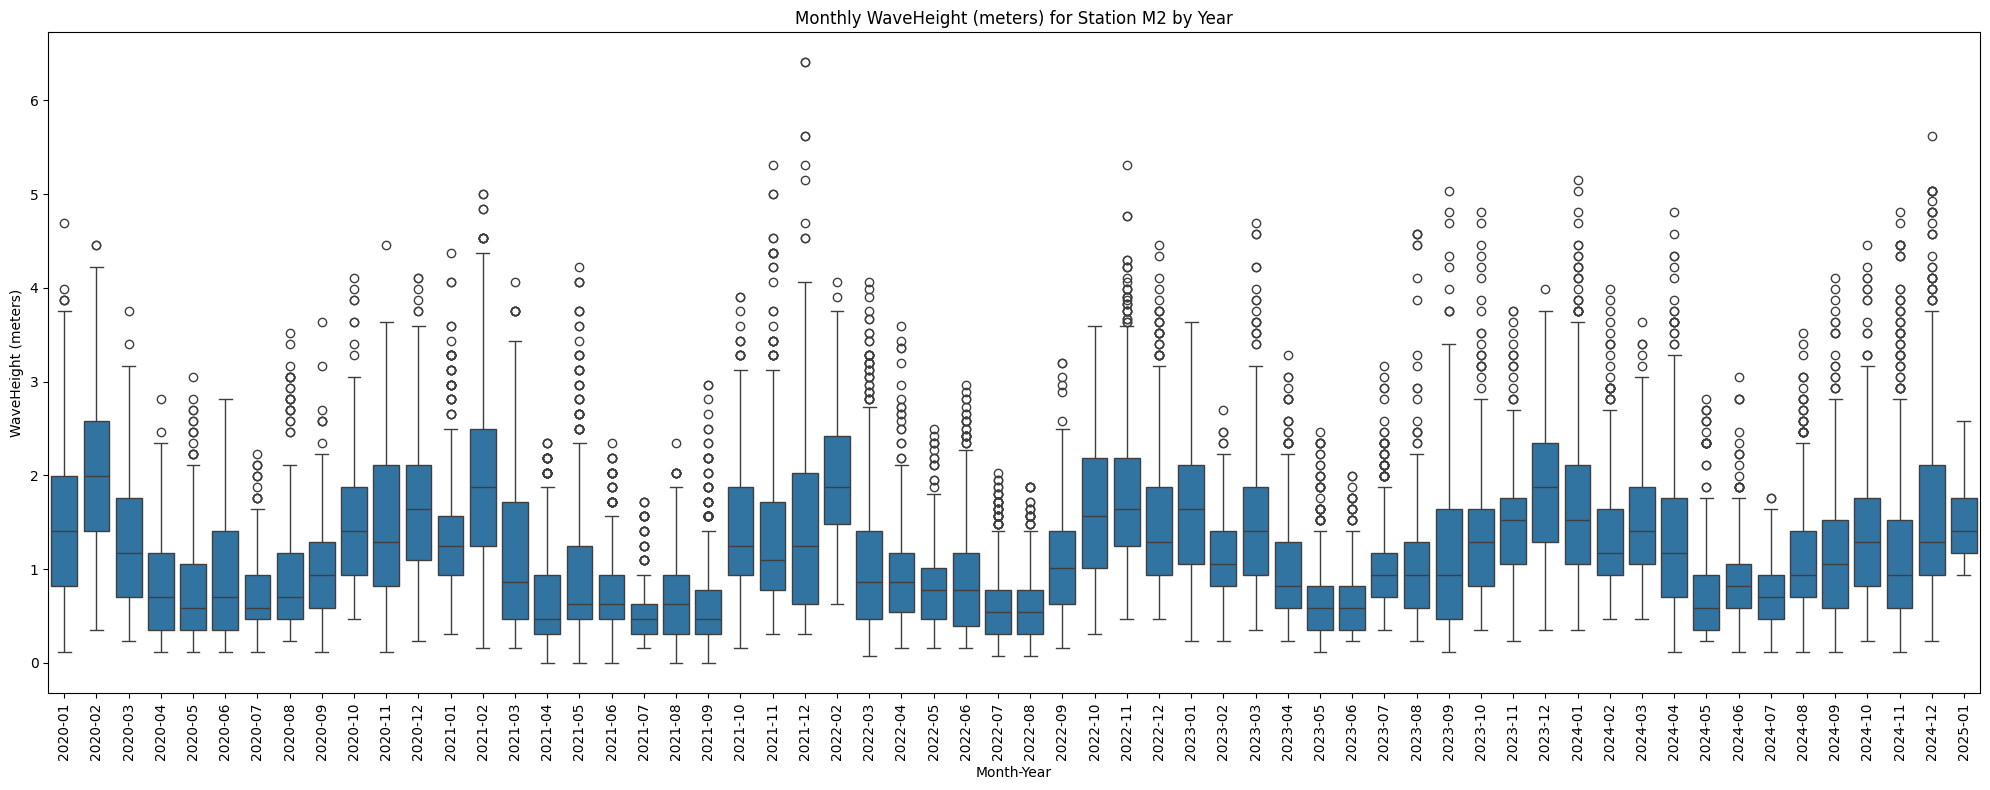

In [31]:
# Ensure unique station IDs are identified
print(buoys_filtered['station_id ()'].unique())

# Filter for a single buoy (e.g., 'M2') and create a copy to avoid SettingWithCopyWarning
buoys_single_buoy = buoys_filtered[buoys_filtered['station_id ()'] == 'M2'].copy()
print(buoys_single_buoy.info())

# Remove timezone from index
buoys_single_buoy.index = buoys_single_buoy.index.tz_localize(None)

# Create a new column for "Month-Year"
buoys_single_buoy['Month-year'] = buoys_single_buoy.index.to_period('M').astype(str)

# Generate the box plot
plt.figure(figsize=(20, 8))
sns.boxplot(
    x='Month-year',
    y='WaveHeight (meters)',
    data=buoys_single_buoy,
)
plt.title('Monthly WaveHeight (meters) for Station M2 by Year')
plt.xlabel('Month-Year')
plt.ylabel('WaveHeight (meters)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()